In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Statistics about the data, including:
* Total sequences
* Top 5 longest and shortest sequences
* Average length of sequences
* Top 5 most and least common sequence length

In [20]:
def stats(dataset, name):
    dataset["length"].hist(bins=100)
    
    # save image as pdf
    plt.savefig(f"{name}_length_hist.pdf")
    plt.show()

    print("-" * 40)

    print("Total sequences:", dataset.shape[0])

    print("-" * 40)

    print("Top 5 longest sequences:")
    print("id     length")
    print(dataset["length"].nlargest(5).to_string())

    print("-" * 40)

    print("Top 5 shortest sequences:")
    print("id      length")
    print(dataset["length"].nsmallest(5).to_string())

    print("-" * 40)

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("-" * 40)

    print("Top 5 most common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nlargest(5).to_string())
    
    print("-" * 40)

    print("Top 5 least common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nsmallest(5).to_string())

In [21]:
positive = pd.read_csv("../datasets/essential_genes/positive.csv")
print(positive.shape)

negative = pd.read_csv("../datasets/essential_genes/essential_genes_negative.csv")
print(negative.shape)

(2010, 2)
(15888, 2)


In [22]:
negative_ids = negative["id"].values
unique_negative_ids = set(negative_ids)
print(len(negative_ids), len(unique_negative_ids), "unique negative ids")

# from Bio.SeqIO.FastaIO import SimpleFastaParser
# def read_fasta(filename):
#     d = {}
#     with open(filename) as handle:
#         for key, sequence in SimpleFastaParser(handle):
#             sequence = sequence.upper()
#             if(sequence != "SEQUENCEUNAVAILABLE"):
#                 key = key.split("|")[0]
#                 d[key] = sequence
#     print(len(d), "keys", len(d.values()), "seqs", len(set(d.values())), "unique")
#     return d

# d = read_fasta("../datasets/essential_genes/mart_export_unspliced.fa")

# # replace negatives sequences with sequence from the dict
# negative["sequence"] = negative["id"].apply(lambda x: d[x])

# remove rows with repeating sequences
negative = negative.drop_duplicates(subset=["sequence"])
print(negative.shape)

15888 15888 unique negative ids
(15179, 2)


In [23]:
# remove sequences with letters different from A, C, G, T
negative = negative[negative["sequence"].str.contains("^[ACGT]+$")]
positive = positive[positive["sequence"].str.contains("^[ACGT]+$")]

print(negative.shape)
print(positive.shape)

(15137, 2)
(2010, 2)


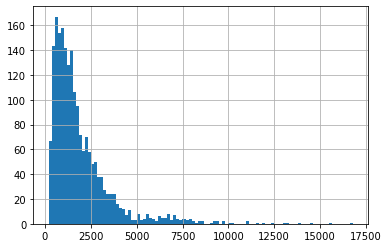

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


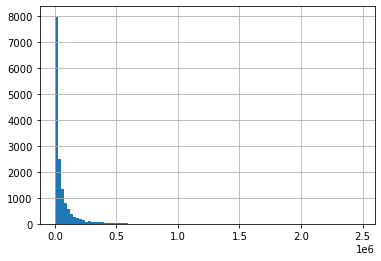

----------------------------------------
Total sequences: 15137
----------------------------------------
Top 5 longest sequences:
id     length
734      2473537
7904     2304997
15761    2303293
5357     2298478
5466     2172911
----------------------------------------
Top 5 shortest sequences:
id      length
15229     76
12750    117
13021    128
13309    135
14763    148
----------------------------------------
Average length: 64199.51278324635
----------------------------------------
Top 5 most common lengths:
length  count
930     15
939     13
945     12
1952    11
597      9
----------------------------------------
Top 5 least common lengths:
length  count
4873       1
20360      1
4419       1
1337027    1
2059620    1


In [24]:
# add a column that contains length of the sequence
positive["length"] = positive["sequence"].apply(len)
negative["length"] = negative["sequence"].apply(len)

stats(positive, "positive_nada")
print("*" * 100)
stats(negative, "negative_nada")

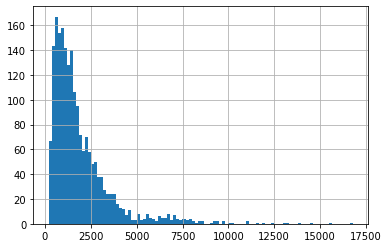

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


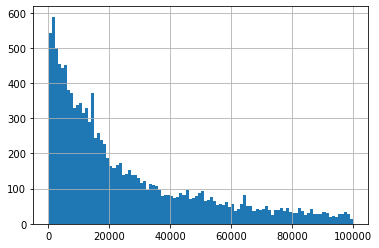

----------------------------------------
Total sequences: 12624
----------------------------------------
Top 5 longest sequences:
id     length
12906    99993
7152     99954
8826     99916
5233     99794
9819     99778
----------------------------------------
Top 5 shortest sequences:
id      length
15229     76
12750    117
13021    128
13309    135
14763    148
----------------------------------------
Average length: 25173.596720532318
----------------------------------------
Top 5 most common lengths:
length  count
930     15
939     13
945     12
1952    11
597      9
----------------------------------------
Top 5 least common lengths:
length  count
60747    1
969      1
23223    1
75025    1
5711     1


In [25]:
# remove seequnces with length less than 50
positive = positive[positive["length"] >= 50]
negative = negative[negative["length"] >= 50]

folder = "essential_genes_100k"
positive = positive[positive["length"] < 100000]
negative = negative[negative["length"] < 100000]

stats(positive, "positive_cut")
print("*" * 100)
stats(negative, "negative_cut")

In [26]:
positive["label"] = 1
negative["label"] = 0

dataset = pd.concat([positive, negative])

# remove length column
dataset = dataset.drop(columns=["length"])

# dataset.to_csv("../datasets/" + folder + "/dataset.csv", index=False)